#PROJECT

In [5]:
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt

In [6]:
url = "https://api.tfl.gov.uk/AccidentStats/2019" 
response = requests.get(url)

data = response.json()
df = pd.json_normalize(data)

df.to_csv('incidenti_tfl_2019.csv', index=False)

In [7]:
df.head()

,$type,id,lat,lon,location,date,severity,borough,casualties,vehicles
0,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345979,51.570865,-0.231959,On Edgware Road Near The Junction With north C...,2019-01-04T21:22:00Z,Slight,Barnet,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
1,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345980,51.603859,-0.187240,On Willow Way Near The Junction With Long Lane,2019-01-04T23:33:00Z,Slight,Barnet,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
2,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345981,51.512198,-0.153122,On north Audley Street Near The Junction With ...,2019-01-04T22:15:00Z,Slight,City of Westminster,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
3,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345982,51.431480,-0.016083,On Bromley Road Near The Junction With Daneswo...,2019-01-04T18:00:00Z,Slight,Lewisham,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...
4,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345983,51.473487,0.145202,On Belmont Road Near The Junction With Bedonwe...,2019-01-04T20:45:00Z,Slight,Bexley,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...,[{'$type': 'Tfl.Api.Presentation.Entities.Acci...


In [8]:
df.describe()

,id,lat,lon
count,50626.000000,50626.000000,50626.000000
mean,544054.000000,51.509198,-0.118897
std,185715.647807,0.067383,0.141133
min,345828.000000,51.295233,-0.509795
25%,358484.250000,51.468225,-0.200805
50%,544054.000000,51.514006,-0.114336
75%,729623.750000,51.553555,-0.035484
max,742280.000000,51.691126,0.307909


In [ ]:
df_vehicles = df.copy()

if df_vehicles['vehicles'].isnull().any():
    print("Warning: Missing or invalid data detected in 'vehicles'. Dropping null values.")
    df_vehicles = df_vehicles.dropna(subset=['vehicles'])

df_vehicles = df_vehicles.explode('vehicles')

df_vehicles.drop(columns=['lat', 'lon', 'date', 'location', 'severity', 'borough', 'casualties'], inplace=True)

df_vehicles_normalized = pd.json_normalize(df_vehicles['vehicles'].values)

if '$type' in df_vehicles_normalized.columns:
    df_vehicles_normalized.drop(columns=['$type'], inplace=True)

df_vehicles = df_vehicles.reset_index(drop=True).join(df_vehicles_normalized)

df_vehicles.drop(columns=['vehicles'], inplace=True)

print("Normalized and processed vehicle data:\n", df_vehicles.head(30))




,$type,id,type
0,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345979,Motorcycle_500cc_Plus
1,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345979,Car
2,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345980,Motorcycle_50_125cc
3,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345980,Car
4,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345980,Car
5,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345981,Car
6,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345982,Motorcycle_50_125cc
7,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345982,Car
8,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345983,Car
9,Tfl.Api.Presentation.Entities.AccidentStats.Ac...,345983,Car


In [78]:
grouped_accidents = df_vehicles.groupby('id')['type'].apply(list).reset_index()

grouped_accidents['unique_vehicle_types'] = grouped_accidents['type'].apply(lambda x: list(set(x)))

grouped_accidents['mixed_vehicles'] = grouped_accidents['unique_vehicle_types'].apply(lambda x: len(x) > 1)

grouped_accidents.columns = ['id', 'vehicles_in_accident', 'unique_vehicle_types', 'mixed_vehicles']
grouped_accidents.head(30)

,id,vehicles_in_accident,unique_vehicle_types,mixed_vehicles
0,345828,"[Car, Car]",[Car],False
1,345829,"[Car, Car]",[Car],False
2,345830,"[PedalCycle, Car]","[Car, PedalCycle]",True
3,345831,[Car],[Car],False
4,345832,"[Car, Car]",[Car],False
5,345833,"[Car, Car]",[Car],False
6,345834,[Car],[Car],False
7,345835,"[Car, Car, Taxi]","[Car, Taxi]",True
8,345836,"[Car, Car]",[Car],False
9,345837,"[Car, Car, Taxi]","[Car, Taxi]",True


In [73]:
# Count rows with mixed vehicles (True)
num_mixed_vehicles = grouped_accidents['mixed_vehicles'].sum()

# Display the result
print(f"Number of accidents involving multiple vehicle types: {num_mixed_vehicles}")


Number of accidents involving multiple vehicle types: 0


In [ ]:

df_vehicles = df_vehicles.groupby(['id']).agg({'type': lambda x: list(x)}).reset_index()
df_vehicles['num_vehicles'] = df_vehicles['type'].apply(lambda x: len(x))
df_vehicles

,id,type,num_vehicles
0,345828,"[Car, Car]",2
1,345829,"[Car, Car]",2
2,345830,"[Car, Car]",2
3,345831,[Car],1
4,345832,"[PedalCycle, PedalCycle]",2
...,...,...,...
50621,742276,[PedalCycle],1
50622,742277,[Car],1
50623,742278,"[PedalCycle, PedalCycle]",2
50624,742279,"[Taxi, Taxi]",2


In [10]:
df['borough'].unique()


array(['City of Westminster', 'Lambeth', 'Camden', 'Brent', 'Newham',
       'Croydon', 'Southwark', 'Barking and Dagenham', 'Merton',
       'Redbridge', 'Tower Hamlets', 'Islington',
       'Kensington and Chelsea', 'Ealing', 'Hounslow', 'Haringey',
       'Wandsworth', 'Hillingdon', 'Lewisham', 'Waltham Forest',
       'Hammersmith and Fulham', 'Enfield', 'Bromley', 'Bexley', 'Harrow',
       'Hackney', 'Greenwich', 'Barnet', 'Kingston',
       'Richmond upon Thames', 'Havering', 'Sutton', 'City of London'],
      dtype=object)

In [11]:
null_data = df[df.isnull().any(axis=1)]
print(null_data)

Empty DataFrame
Columns: [id, lat, lon, location, date, severity, borough, casualties, vehicles]
Index: []


In [12]:
print(len(data))
exmpl = {
    "$type": "Tfl.Api.Presentation.Entities.AccidentStats.AccidentDetail, Tfl.Api.Presentation.Entities",
    "id": 345979,
    "lat": 51.570865,
    "lon": -0.231959,
    "location": "On Edgware Road Near The Junction With north Circular Road",
    "date": "2019-01-04T21:22:00Z",
    "severity": "Slight",
    "borough": "Barnet",
    "casualties": [{
        "$type": "Tfl.Api.Presentation.Entities.AccidentStats.Casualty, Tfl.Api.Presentation.Entities",
        "age": 20,
        "class": "Driver",
        "severity": "Slight",
        "mode": "PoweredTwoWheeler",
        "ageBand": "Adult"
    }],
    "vehicles": [{
        "$type": "Tfl.Api.Presentation.Entities.AccidentStats.Vehicle, Tfl.Api.Presentation.Entities",
        "type": "Motorcycle_500cc_Plus"
    }, {
        "$type": "Tfl.Api.Presentation.Entities.AccidentStats.Vehicle, Tfl.Api.Presentation.Entities",
        "type": "Car"
    }]
}

50626


In [49]:
df_vehicles.head(30)


,id,type,num_vehicles
0,345828,"[Car, Car]",2
1,345829,"[Car, Car]",2
2,345830,"[Car, Car]",2
3,345831,[Car],1
4,345832,"[PedalCycle, PedalCycle]",2
5,345833,"[Car, Car]",2
6,345834,[Car],1
7,345835,"[Car, Car, Car]",3
8,345836,"[Car, Car]",2
9,345837,"[Car, Car, Car]",3


In [63]:
df_vehicles =grouped_accidents

In [64]:
unique_types = set(vehicle for sublist in df_vehicles['type'] for vehicle in sublist)

print(len(unique_types))
unique_types

15


{'AgriculturalVehicle',
 'BusOrCoach',
 'Car',
 'HeavyGoodsVehicle',
 'LightGoodsVehicle',
 'MediumGoodsVehicle',
 'Minibus',
 'Motorcycle_0_50cc',
 'Motorcycle_125_500cc',
 'Motorcycle_500cc_Plus',
 'Motorcycle_50_125cc',
 'OtherMotorVehicle',
 'PedalCycle',
 'RiddenHorse',
 'Taxi'}

In [65]:
unique_types = set(vehicle for sublist in df_vehicles['type'] for vehicle in sublist)

print(len(unique_types))
unique_types

15


{'AgriculturalVehicle',
 'BusOrCoach',
 'Car',
 'HeavyGoodsVehicle',
 'LightGoodsVehicle',
 'MediumGoodsVehicle',
 'Minibus',
 'Motorcycle_0_50cc',
 'Motorcycle_125_500cc',
 'Motorcycle_500cc_Plus',
 'Motorcycle_50_125cc',
 'OtherMotorVehicle',
 'PedalCycle',
 'RiddenHorse',
 'Taxi'}

In [66]:
unique_lists = df_vehicles['type'].apply(tuple).unique()
print(len(unique_lists))
unique_lists

89


array([('Car', 'Car'), ('Car',), ('PedalCycle', 'PedalCycle'),
       ('Car', 'Car', 'Car'), ('Taxi', 'Taxi', 'Taxi'), ('Taxi', 'Taxi'),
       ('LightGoodsVehicle', 'LightGoodsVehicle'), ('Taxi',),
       ('Motorcycle_125_500cc', 'Motorcycle_125_500cc'),
       ('Motorcycle_50_125cc', 'Motorcycle_50_125cc'),
       ('Motorcycle_50_125cc',), ('BusOrCoach', 'BusOrCoach'),
       ('Motorcycle_500cc_Plus', 'Motorcycle_500cc_Plus'),
       ('PedalCycle',), ('Motorcycle_125_500cc',),
       ('Car', 'Car', 'Car', 'Car'), ('BusOrCoach',),
       ('Motorcycle_0_50cc', 'Motorcycle_0_50cc', 'Motorcycle_0_50cc'),
       ('Motorcycle_125_500cc', 'Motorcycle_125_500cc', 'Motorcycle_125_500cc'),
       ('OtherMotorVehicle',), ('LightGoodsVehicle',),
       ('MediumGoodsVehicle', 'MediumGoodsVehicle'),
       ('OtherMotorVehicle', 'OtherMotorVehicle'),
       ('BusOrCoach', 'BusOrCoach', 'BusOrCoach'),
       ('PedalCycle', 'PedalCycle', 'PedalCycle'),
       ('PedalCycle', 'PedalCycle', 'PedalCycle'

In [67]:
# Vehicle categories
categories = {
    "Motocycle": ["Motorcycle_0_50cc", "Motorcycle_50_125cc", "Motorcycle_125_500cc", "Motorcycle_500cc_Plus"],
    "Cart": ["Car", "Taxi", "Minibus", "LightGoodsVehicle"],
    "Heavy_Vehicles": ["BusOrCoach", "HeavyGoodsVehicle", "MediumGoodsVehicle"],
    "Pedalcycle": ["PedalCycle"],
}

category_lookup = {vehicle: category for category, vehicles in categories.items() for vehicle in vehicles}

def replace_with_category(vehicle_tuple):
    return tuple(category_lookup.get(vehicle, "Unknown") for vehicle in vehicle_tuple)

def is_mixed_category(vehicle_tuple):
    categories_in_tuple = set(replace_with_category(vehicle_tuple))
    return len(categories_in_tuple) > 1  # True if more than one category present

categorized_unique_lists = [replace_with_category(vehicle_tuple) for vehicle_tuple in unique_lists]

mixed_category_tuples = [vehicle_tuple for vehicle_tuple in unique_lists if is_mixed_category(vehicle_tuple)]

print("Categorized unique lists:", categorized_unique_lists)
print("Tuples with mixed categories (accidents between different vehicles):", mixed_category_tuples)


Categorized unique lists: [('Cart', 'Cart'), ('Cart',), ('Pedalcycle', 'Pedalcycle'), ('Cart', 'Cart', 'Cart'), ('Cart', 'Cart', 'Cart'), ('Cart', 'Cart'), ('Cart', 'Cart'), ('Cart',), ('Motocycle', 'Motocycle'), ('Motocycle', 'Motocycle'), ('Motocycle',), ('Heavy_Vehicles', 'Heavy_Vehicles'), ('Motocycle', 'Motocycle'), ('Pedalcycle',), ('Motocycle',), ('Cart', 'Cart', 'Cart', 'Cart'), ('Heavy_Vehicles',), ('Motocycle', 'Motocycle', 'Motocycle'), ('Motocycle', 'Motocycle', 'Motocycle'), ('Unknown',), ('Cart',), ('Heavy_Vehicles', 'Heavy_Vehicles'), ('Unknown', 'Unknown'), ('Heavy_Vehicles', 'Heavy_Vehicles', 'Heavy_Vehicles'), ('Pedalcycle', 'Pedalcycle', 'Pedalcycle'), ('Pedalcycle', 'Pedalcycle', 'Pedalcycle', 'Pedalcycle'), ('Motocycle', 'Motocycle', 'Motocycle'), ('Motocycle', 'Motocycle', 'Motocycle'), ('Heavy_Vehicles',), ('Heavy_Vehicles', 'Heavy_Vehicles'), ('Motocycle',), ('Motocycle',), ('Motocycle', 'Motocycle'), ('Heavy_Vehicles', 'Heavy_Vehicles', 'Heavy_Vehicles', 'Heavy

Unique vehicle types in the dataset: {'RiddenHorse', 'LightGoodsVehicle', 'Motorcycle_500cc_Plus', 'HeavyGoodsVehicle', 'BusOrCoach', 'Motorcycle_125_500cc', 'Motorcycle_0_50cc', 'MediumGoodsVehicle', 'Motorcycle_50_125cc', 'Car', 'Taxi', 'OtherMotorVehicle', 'Minibus', 'AgriculturalVehicle', 'PedalCycle'}


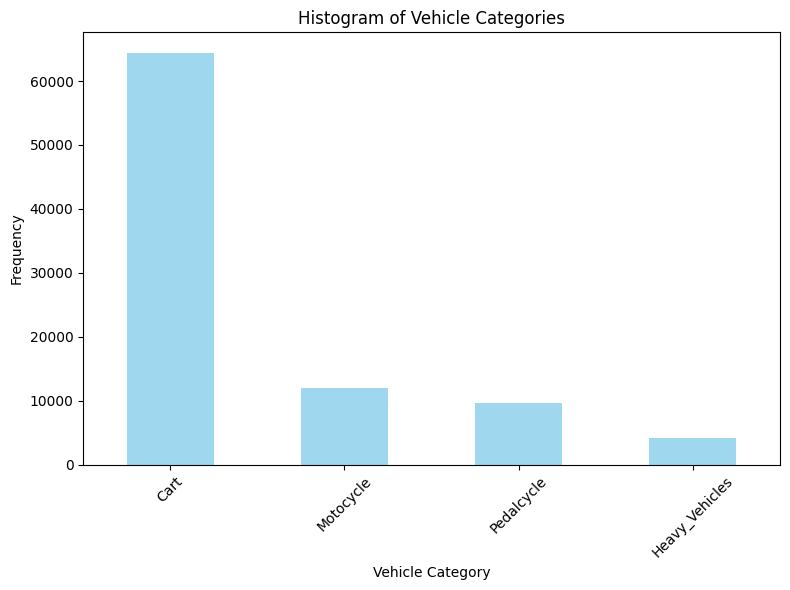

In [34]:

categories = {
    "Motocycle": ["Motorcycle_0_50cc", "Motorcycle_50_125cc", "Motorcycle_125_500cc", "Motorcycle_500cc_Plus"],
    "Cart": ["Car", "Taxi", "Minibus", "LightGoodsVehicle"],
    "Heavy_Vehicles": ["BusOrCoach", "HeavyGoodsVehicle", "MediumGoodsVehicle"],
    "Pedalcycle": ["PedalCycle"],
}

def categorize_vehicle_type(vehicle_list):
    categorized = []
    for vehicle in vehicle_list:
        for category, types in categories.items():
            if vehicle in types:
                categorized.append(category)
                break
    return categorized

df_vehicles['categories'] = df_vehicles['type'].apply(categorize_vehicle_type)

unique_vehicle_types = set(vehicle for sublist in df_vehicles['type'] for vehicle in sublist)
print("Unique vehicle types in the dataset:", unique_vehicle_types)

category_counts = df_vehicles['categories'].explode().value_counts()

plt.figure(figsize=(8, 6))
category_counts.plot(kind='bar', color='skyblue', alpha=0.8)
plt.title('Histogram of Vehicle Categories')
plt.xlabel('Vehicle Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# NOTES SECTION

## 3 OPTIONS:

* Forcasting
 * Determine out of the dataset what would happen
 * Predict accidents most likely
 * we could use past year data and compare directly with more recent data

* Corelating variables
 * Finding relationship betweetn different variables
 * expanding knowledge base to variables such as
 * Street direction, speed limit, street light, roundabout presence
 * tackle problems that normal statistics patterns or resarch can struggle with
 * Anomaly detection


* Optimization
 * Optimize the dataset
 * Most likely determining the best way to have the London transportation system
 * A simulation, hard to determine results




We could study what subjects are more at risk of severe accidents

What parts of the city are the most at risk

For insurance purposes


IDEA:
We could study the correlation between variables and accidents -> building a cost function to determine the reliability of a certain subject
Could be useful for INSURANCE COMPANIES